<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 9th exercise: <font color="#C70039">Using pre-trained CNNs for better predictions</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook modifications and adaptations: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   13.01.2023
* Name: Laura Fredrich
* Matrikelnr.: 11148559

<table><tr>
<td> <img src="https://miro.medium.com/max/491/1*heOde2iTazjgrF7YzvOFyQ.png" style="width: 350px;"/> </td>
<td> <img src="https://miro.medium.com/max/510/1*7ZD-u-h8hFPuN2PYJvLMBw.png" style="width: 363px;"/> </td>
</tr></table>

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information about your tasks (e.g. regarding the set of certain paramaters or specific computational tricks, etc.), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:

This notebook allows for reviewing two additional and essential techniques for applying deep learning to small data sets. These are: 
* doing feature extraction with a pre-trained network (this will get you to an accuracy of 90% up to 93%)
* fine-tuning a pre-trained network (this will get you to a final accuracy of 95%). 

In combination, the three strategies you have learned, as (1) training a small model from scratch as in the previous exercise, (2) doing feature extracting using a pre-trained model, and (3) fine-tuning a pre-trained model will constitute your future toolbox for tackling the problem of performing computer vision with small data sets.

The reason the latter two are good options is that deep learning models are by nature highly reusable. It is possible to take an image classification model trained on a large-scale data set and then reuse it on a significantly different problem with only minor changes. 
Specifically, in the case of computer vision, many pre-trained models (usually trained on the ImageNet data set) are now publicly available for download and can be used to bootstrap (`https://de.wikipedia.org/wiki/Bootstrapping`) powerful vision models out of very little data. 

That is what you will learn in this exercise.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
Within this notebook, the tasks that you need to work on are always listed as bullet points below. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully.  
    * add comments whereever you feel it necessary for better understanding.
    * run the notebook for the first time and note the result in a markdown table. 
        * I have provided you with an example of a table in markdown (see below). Make sure you adapt your table accordingly. 
        * Put the table at the end of the notebook. 
        * This type of table will be needed in the other exercises as well. Always put it at the end.
    
| type of method | loss function | optimizer | accuracy |
| :-: | :-: | :-: | :-: |
| classification | categorical_crossentropy | bamm !|.666

4. in PART I, 
    * save the model of feature extraction with method A
    * load the model in a new, own code line,
    * print out the model's summary,
5. in PART I, if you have a personal data cracking machine with GPU support try to compile and train the model of feature extraction with method B.
    * if you do not have a GPU (Note: you can have GPU support in Colab, too), then 
        * load the model I have saved for you on Moodle (it was too large to be put on github),
        * print out the model's summary.
6. then, after you loaded the model,
    * take the validation data set and validate it using a history object,
    * take the history object and plot the validaton results using pyplot.
7. in PART II,  
    * save the model using fine-tuning
    * validate the model by using the validation data set using a history object
    * take the history object and plot the validaton results using pyplot.
8. in PART II, do a validation using the same model
    * with more validation data (4000 samples)
    * with less validation data (500 samples)
   Store the results into a table. What is your observation?
   
-----------------------------------------------------------------------------------

## NOTE: 

Aufgrund extremst langer Ladezeiten, wurde die Datenmenge auf weniger Samples pro Durchlauf verringert.

## START OF THE NOTEBOOK CODE
----------------------------------------------------------------------------------------------------------------------
### Preface

A pre-trained network is simply a saved network previously trained on a large data set, typically on a large-scale image classification task. If this original data set is large and general enough, then the spatial feature hierarchy learned by the pre-trained network can effectively act as a generic model of our visual world and hence its features can prove useful for many different computer vision problems, even though these new problems might involve completely different classes from those of the original task. 

For instance, one might train a network on ImageNet (where classes are mostly animals and everyday objects) and then re-purpose this trained network for something as remote as identifying furniture items in images. Such portability of learned features across different problems is a key advantage of deep learning compared to many older shallow learning approaches, and it makes deep learning very effective for small-data problems.

In the case of this exercise, a large CNN trained on the ImageNet data set is going to be used. ImageNet contains many animal classes, including different species of cats and dogs, and we can thus expect to perform very well on our cat vs. dog classification problem (1.4 million labeled images and 1000 different classes: read more following <a href="https://de.wikipedia.org/wiki/ImageNet">https://de.wikipedia.org/wiki/ImageNet</a>).

We will use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used CNN architecture for ImageNet (<a href="https://keras.io/api/applications/vgg/">https://keras.io/api/applications/vgg/</a>). 

Although it is a bit of an older model, its architecture is similar to what you are already familiar with, and easy to understand without introducing any new concepts. You may also have heart other model names e.g. -- VGG, ResNet, Inception, Inception-ResNet, Xception... you will get used to them, as they will come up frequently if you keep doing deep learning for computer vision.

So finally, let's get started with feature extraction.

## <font color="#C70039">PART I</font>
### building a CNN by using a pre-trained CNN with feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

As we saw previously, CNNs used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely (fully) connected classifier. 

The first part is called the "convolutional base" of the model. In the case of CNNs, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output (see pages 254-258 in slides `DIS21a.1-9.Convolutional.NeuralNetworks.pdf`).

Why only reuse the convolutional base? Could we reuse the densely-connected classifier as well? 

In general, it should be avoided. The reason is simply that the representations learned by the convolutional base are likely to be more generic and therefore more reusable: the 
feature maps of a CNN are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer vision problem at hand. 
On the other end, the representations learned by the classifier will necessarily be very specific to the set of 
classes that the model was trained on -- they will only contain information about the presence probability of this or that class in the entire picture. 
Additionally, representations found in densely (fully) connected layers no longer contain any information about _where_ objects are located in the input image: these layers get rid of the notion of space, whereas the object location is still described by convolutional feature maps. For problems where object location matters, densely (fully) connected features would be largely useless.

Note, the level of generality (and therefore reusability) of the representations extracted by specific convolution layers depends on the depth of the layer in the model. Layers that come earlier in the model, extract local, highly generic feature maps (such as visual edges, colors, and textures), while layers higher-up extract more abstract concepts (such as "cat ear" or "dog eye"). So if your new data set differs a lot from the data set that the original model was trained on, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base (compare the two images at the top of this exercise notebook that I provided you with).

In our case, since the ImageNet class set did contain multiple dog and cat classes, it is likely that it would be beneficial to reuse the information contained in the densely (fully) connected layers of the original model. However, we will choose not to, in order to cover the more general case where the class set of the new problem does not overlap with the class set of the original model.

### approach 

Put the above said into practice by using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from our cat and dog images, and then training a cat vs. dog classifier on top of these features.

The VGG16 model, among others, comes pre-packaged with Keras. You can import it from the `keras.applications` module. Here's the list of 
image classification models (all pre-trained on the ImageNet dataset) that are available as part of `keras.applications`:

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

To read more about the models use this reference: <a href="https://wiki.tum.de/display/ldv/Vergleich+von+vortrainierten+Neuronalen+Netzen">https://wiki.tum.de/display/ldv/Vergleich+von+vortrainierten+Neuronalen+Netzen</a>.<br>
For now, instantiate the VGG16 model:

In [ ]:
import tensorflow
tensorflow.keras.__version__

'2.9.0'

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


Pass three arguments to the VGG16 constructor. These are:

* *weights*: specifies which weight checkpoint in keras to initialize the model from

* *include_top*: refers to including (or not including) the densely connected classifier on top of the network. By default, this densely connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely connected classifier (with only two classes, namely cat and dog), we don't need to include it.

* *input_shape*: the shape of the image tensors that will be fed to the network. This argument is purely optional: if it is not specified, then the network will be able to process inputs of any size. Use here the size of the inputs as in the last exercise.

Print out the model's summary and have a look at the architecture of the VGG16.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

This is the architecture of the VGG16 convolutional base. Its is very similar to the simple CNNs that were used in exercises 7 and 8.

The final feature map has got a shape of `(4, 4, 512)`. On top of this feature, a densely connected classifier will be sticked. 

<font color="#C70039">NOTE:</font>At this point, there are two ways you could proceed: 

1. <font color="orange">possible method A</font>
    * running the convolutional base over the entire data set
    * recording its output to a numpy array on disk
    * then using this data as input to a standalone densely connected classifier 

This method is very fast and cheap to run because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. However, for the exact same reason, this technique would not allow for leveraging data augmentation at all.

2. <font color="blue">possible method B</font>
    * extending the convolutional base by adding `Dense` layers on top
    * then running the whole thing end-to-end on the entire input data. 
    
This method allows for using data augmentation, because every input image is going through the convolutional base every time it is seen by the model. However, for this same reason, this technique is far more expensive than the first one.

In this ninth exercise both techniques are shown. 

-----------------

## <font color="orange">method A</font>

Let's walk through the code required to set-up the first method A: recording the output of `conv_base` on the data and using these outputs as inputs to a new model.

Simply start by running instances of the previously-introduced `ImageDataGenerator()` to extract images as numpy arrays as well as their labels. Then extract the features from these images simply by calling the `predict` method of the `conv_base` model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/Programming/catsdogs/train'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
1/1 [==============================] - 3s 3s/step
Found 3000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 3s 3s/step


The extracted features are currently of shape `(samples, 4, 4, 512)`. <br>
Feed them to a densely connected classifier!<br>
Hence, flatten them to `(samples, 8192)`, (reshape into 4x4x512 !!!)

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Now, define a densely (fully) connected classifier and train it on the data and labels that were just recorded. Use 50% dropout as regularization method.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# compare the parameters with those from Ex.8
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), # set a low learning rate
              loss='binary_crossentropy', 
              metrics=['acc']) 

# write everything into a history object and set the same hyperparameters from Ex.8
# train and validate the FC-ANN in one pass
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 20ms/step - loss: 0.6060 - acc: 0.6600 - val_loss: 0.4399 - val_acc: 0.8170
Epoch 2/30
100/100 [==============================] - 2s 17ms/step - loss: 0.4451 - acc: 0.7940 - val_loss: 0.3672 - val_acc: 0.8440
Epoch 3/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3751 - acc: 0.8370 - val_loss: 0.3444 - val_acc: 0.8440
Epoch 4/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3277 - acc: 0.8685 - val_loss: 0.3173 - val_acc: 0.8650
Epoch 5/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2962 - acc: 0.8840 - val_loss: 0.3003 - val_acc: 0.8760
Epoch 6/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2824 - acc: 0.8825 - val_loss: 0.2978 - val_acc: 0.8700
Epoch 7/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2609 - acc: 0.8955 - val_loss: 0.2818 - val_acc: 0.8830
Epoch 8/30
100/100 [==============================] - 2s 18ms/step - 

Training is very fast, since it only has got to deal with two dense layers. 
An epoch takes between two to three seconds to compute on CPU. (on Colab with pure CPU it is going to be slower for sure)<br> 
Let's have a look at the loss and accuracy curves during training plotting the history object with pyplot.

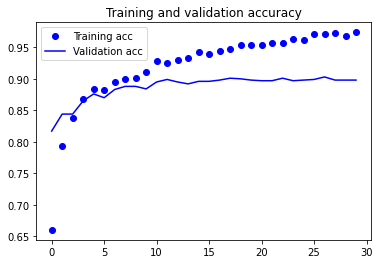

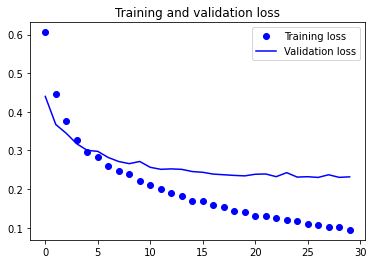

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### result of feature extraction: <font color="orange">method A</font>
The models reaches a validation accuracy of about 90% and hence it is much better than what was achieved in the previous, eigth exercise with the small self-build model trained from scratch. 
However, the plots also indicate that the model starts overfitting almost from start -- despite using dropout with a fairly large rate (Dropout(0.5)). 
This is because method A does not leverage data augmentation, which is essential to preventing overfitting with small image data sets.

<font color="ce33ff">TASK 4</font>

    * save the model of feature extraction with method A
    * load the model in a new, own code line,
    * print out the model's summary,

In [ ]:
#save model 
model.save('cats_dogs_feature_extraction.h5')

In [ ]:
model_feature = model.load_weights('cats_dogs_feature_extraction.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


## <font color="green">method B</font>
Now, try the second method (method B) for doing feature extraction, which is much slower and more expensive, but which allows 
for leveraging `data augmentation` during training: extending the conv_base model and running it end-to-end on the inputs. 

----------------------------------------

<font color="#C70039">IMPORTANT NOTE | IMPORTANT NOTE | IMPORTANT NOTE: </font>Method B is in fact so expensive that you should only try it if you have access to a GPU: it lasts a really long time on CPU. So either you have access to a really powerful GPU (I have not tested it on Google Colab with GPU support yet) or if not, and you cannot run your code on a GPU, then the previous method A is your way to go.

<font color="ce33ff">Just to give you an idea:</font> My virtual machine at the institute has got only CPU support (but ordentlich Wumms!!! as you can see from the following configuration) and it lasts for about 55 minutes to train and validate 30 epochs.

<img src="https://github.com/gheisenberg/Course-DIS21a.1/blob/master/system.png?raw=1" style="float: center;" width="600">

It would be fun to see and test, for how long it lasts to train and validate an epoch in Google's Colab (I have not done that yet).

Nevertheless, this exercise shows the way method B is implemented, so you will be introduced to it and know how to use it somewhen later. Try it youself, if you are brave enough :-)

----------------------------------------

Because models behave just like layers, a model (like the `conv_base`) can be added to a `Sequential` model just like adding a layer. So doing it the following way, is the way to go.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

This was pretty straight forward and this is what the model looks like now

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Now, it becomes obvious that the VGG16 is fairly large with a convolutional base of 14.714.688 parameters. 
The classifier we are adding on top has got additional 2 million parameters.

Before compiling and training the new model, a very important thing to do is to `freeze` the convolutional base. **Freezing** a layer or set of layers means preventing their weights from getting updated during training again, since they are already trained, right. If this is forgotten, then the representations that were previously learned by the convolutional base would get modified (forgotten) during training. 
Since the dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In Keras, freezing a network is simply done by setting its `trainable` attribute to `False`:

In [ ]:
conv_base.trainable = True # should be the default setting

print('This is the number of trainable weight tensors '
      '\033[4mbefore\033[0m freezing the conv_base:', len(model.trainable_weights))

# now freeze it
conv_base.trainable = False

print('This is the number of trainable weight tensors '
      '\033[4mafter\033[0m freezing the conv_base:', len(model.trainable_weights))

This is the number of trainable weight tensors before freezing the conv_base: 30
This is the number of trainable weight tensors after freezing the conv_base: 4


Now, only the weights from the two dense layers will be trained which is a total of four weight tensors - two per layer (the main weight matrix and the bias vector). 

<font color="#C70039">IMPORTANT NOTE:</font>

* in order for these changes to take effect, first compile the model. 
* if weight trainability is ever modified after compilation, then the model must be re-compiled or these changes will be ignored.

Finally, start training the model with the same data augmentation configuration that was used in exercise 8.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note again, that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2)

Found 6000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Epoch 1/5
10/10 - 159s - loss: 0.6519 - acc: 0.6500 - val_loss: 0.5941 - val_acc: 0.7400 - 159s/epoch - 16s/step
Epoch 2/5
10/10 - 92s - loss: 0.6198 - acc: 0.6600 - val_loss: 0.5372 - val_acc: 0.7900 - 92s/epoch - 9s/step
Epoch 3/5
10/10 - 94s - loss: 0.6135 - acc: 0.6850 - val_loss: 0.5235 - val_acc: 0.8450 - 94s/epoch - 9s/step
Epoch 4/5
10/10 - 94s - loss: 0.5890 - acc: 0.7300 - val_loss: 0.4892 - val_acc: 0.8400 - 94s/epoch - 9s/step
Epoch 5/5
10/10 - 89s - loss: 0.5565 - acc: 0.6850 - val_loss: 0.5000 - val_acc: 0.7550 - 89s/epoch - 9s/step


In [ ]:
model.save('CatDogClass_pretrained_CNN_FeatExtraction_using_data_augmentation.h5')

In [ ]:
# dump the history object to a file using pickle
import pickle

class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

with open('C:/Users/gheisenb/Desktop/home/projects/ANN/Übungen/src'+
          '/CatDogClass_pretrained_CNN_FeatExtraction_using_data_augmentation_History', 'wb') as file:
    model_history= History_trained_model(history.history, history.epoch, history.params)
    pickle.dump(model_history, file, pickle.HIGHEST_PROTOCOL)    

FileNotFoundError: ignored

<font color="ce33ff">TASKS 5 and 6</font>

5. in PART I, if you have a personal data cracking machine with GPU support try to compile and train the model of feature extraction with method B.
    * if you do not have a GPU (Note: you can have GPU support in Colab, too), then 
        * load the model I have saved for you on Moodle (it was too large to be put on github),
        * print out the model's summary.
6. then, after you loaded the model,
    * take the validation data set and validate it using a history object,
    * take the history object and plot the validaton results using pyplot.

In [ ]:
model.load_weights('/content/drive/MyDrive/Programming/ex9/CatDogClass_pretrained_CNN_FeatExtraction_using_data_augmentation.h5')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/5
10/10 [==============================] - 94s 10s/step - loss: 0.2773 - acc: 0.8500 - val_loss: 0.2609 - val_acc: 0.8950
Epoch 2/5
10/10 [==============================] - 92s 10s/step - loss: 0.3105 - acc: 0.8700 - val_loss: 0.2568 - val_acc: 0.8750
Epoch 3/5
10/10 [==============================] - 91s 10s/step - loss: 0.2637 - acc: 0.9000 - val_loss: 0.2660 - val_acc: 0.8850
Epoch 4/5
10/10 [==============================] - 85s 9s/step - loss: 0.3279 - acc: 0.8600 - val_loss: 0.2373 - val_acc: 0.8950
Epoch 5/5
10/10 [==============================] - 87s 9s/step - loss: 0.2636 - acc: 0.8950 - val_loss: 0.2755 - val_acc: 0.8700


Plot the results again.

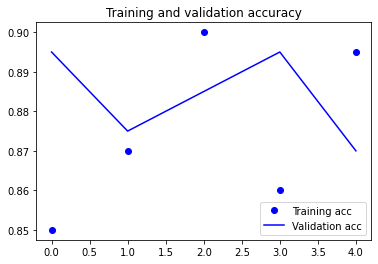

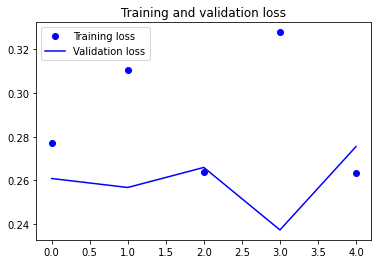

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### result of feature extraction: <font color="green">method B</font>

Double BAMM! This is a much higher validation accuracy using data augmentation and so it is much better than the small CNN trained from scratch.

---------------------------
---------------------------

## <font color="#C70039">PART II</font>
### building a CNN by using a pre-trained CNN with fine-tuning

Complementary to *feature extraction*, is the so-called _fine-tuning_.<br>
Fine-tuning consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both, the newly added part of the model (in this case, the densely (fully) connected classifier) and these top layers. 
It is called `fine-tuning`, because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.

------

We have stated before that it was necessary to freeze the convolution base of VGG16 in order to be able to train a randomly initialized classifier on top. For the same reason, it is only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classifier wasn't already trained, then the error signal propagating through the network during training would become too large, and the representations previously learned by the layers being fine-tuned would get destroyed. Thus, the steps for fine-tuning a network are as follows<br>
(see page 257 of slides `DIS21a.1-9.Convolutional.NeuralNetworks.pdf`):

1. Add your custom network on top of an already trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

The first 3 steps are already completed when you did feature extraction. Thus proceed with the 4th step, unfreeze the `conv_base`, and then freeze individual layers inside of it.

As a reminder, this is what the convolutional base looks like:

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     


The last 3 convolutional layers will be fine-tuned, which means that all layers up until `block4_pool` should be frozen, and the layers `block5_conv1`, `block5_conv2` and `block5_conv3` should set to be trainable.

<font color="#C70039">NOTE:</font> the question would come up, why not fine-tune more layers? 
Why not fine-tune the entire convolutional base? Obviously you could decide to do that, however, before you are starting this entirely new training, consider the following:

* Earlier layers in the convolutional base encode more generic, reusable features, while layers higher up encode more specialized features. It is more useful to fine-tune the more specialized features as these are the ones that need to be repurposed on the new problem at hand. There would be fast-decreasing returns in fine-tuning lower layers.

* The more parameters are trained, the more the model is at risk of overfitting. The convolutional base has got 15 million parameters, hence, it would be risky to attempt to train it on the small dataset.

Thus, in the current situation it is a pretty good strategy to only fine-tune the top 2 to 3 layers in the convolutional base.

So, do continue where you stopped in the previous example.

In [ ]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now we can start fine-tuning our network. We will do this with the RMSprop optimizer, using a very low learning rate. The reason for using 
a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 layers that we are 
fine-tuning. Updates that are too large may harm these representations.

Now let's proceed with fine-tuning:

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Save the model to your disk for further processing. I have put the model on Moodle, since it was too large to be put on github. On my machine (the same that was mentioned above) the computation last for about 4,5 hours.

In [ ]:
model.save('CatDogClass_pretrained_CNN_FeatExtraction_using_fine-tuning.h5')

In [ ]:
# dump the history object to a file using pickle
with open('C:/Users/gheisenb/Desktop/home/projects/ANN/Übungen/src'+
          '/CatDogClass_pretrained_CNN_FeatExtraction_using_fine-tuning_History', 'wb') as file:
    model_history= History_trained_model(history.history, history.epoch, history.params)
    pickle.dump(model_history, file, pickle.HIGHEST_PROTOCOL)    

<font color="ce33ff">TASK 7</font>
7. in PART II,  
    * save the model using fine-tuning
    * validate the model by using the validation data set using a history object
    * take the history object and plot the validaton results using pyplot.

In [ ]:
'''load the model here'''
model.load_weights('/content/drive/MyDrive/Programming/ex9/CatDogClass_pretrained_CNN_FeatExtraction_using_fine-tuning.h5')


'''do a validation using a history object'''
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/5
10/10 [==============================] - 132s 14s/step - loss: 0.2799 - acc: 0.9350 - val_loss: 0.4653 - val_acc: 0.9150
Epoch 2/5
10/10 [==============================] - 91s 10s/step - loss: 0.3151 - acc: 0.9200 - val_loss: 0.2506 - val_acc: 0.9500
Epoch 3/5
10/10 [==============================] - 84s 9s/step - loss: 0.2224 - acc: 0.9450 - val_loss: 0.4867 - val_acc: 0.9200
Epoch 4/5
10/10 [==============================] - 85s 9s/step - loss: 0.3749 - acc: 0.9100 - val_loss: 0.2338 - val_acc: 0.9500
Epoch 5/5
10/10 [==============================] - 85s 9s/step - loss: 0.3602 - acc: 0.9100 - val_loss: 0.3537 - val_acc: 0.9200


Now, plot the results using the same plotting code as before.

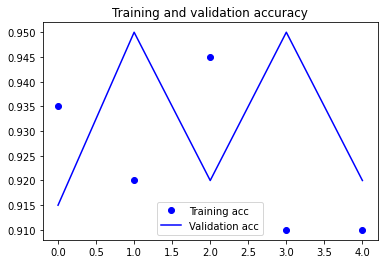

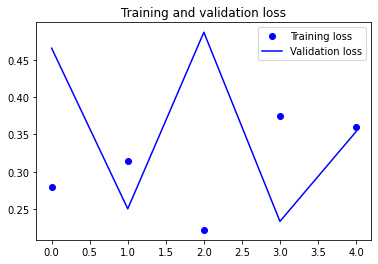

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### result of fine tuning

This is a higher validation accuracy using data augmentation and so it is much better than the small CNN trained from scratch. These curves look very noisy. To make them more readable, smooth them by replacing every loss and accuracy value with the exponential moving averages of these quantities. Here is a trivial utility function to do this. BTW, this is very often used when working with financial stock market data.Try to follow and understand the code.

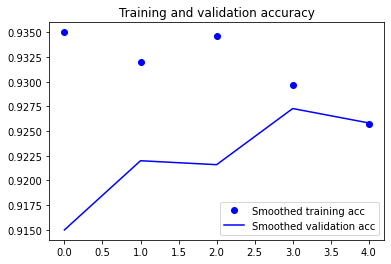

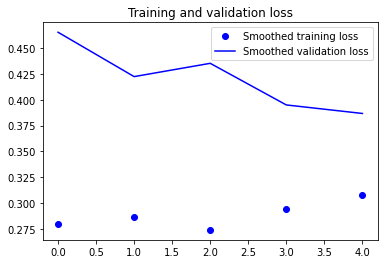

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Double BAMM!<br>
These curves look much cleaner and more stable. This is a very nice 1% absolute improvement.

<font color="#C70039">IMPORTANT NOTE:</font> See that the loss curve does not show any real improvement (in fact, it is deteriorating). You may wonder, how could accuracy improve if the loss isn't decreasing? The answer is simple: what is displayed here is an average of pointwise loss values, but what actually matters for accuracy is the distribution of the loss values, not their average, since accuracy is the result of a binary thresholding of the class probability predicted by the model. The model may still be improving even if this isn't reflected in the average loss.

Now finally evaluate this model on the test data.

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 3000 images belonging to 2 classes.


<ipython-input-45-19f8443b6c42>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9399999976158142



Here we get a test accuracy of 94%. Using modern deep learning techniques, we managed to reach this result using only a very small fraction of the training data available (remember the dogs and cats data set to be 25.000 pictures large). There is a huge difference between being able to train on 20.000 samples compared to 2.000 samples!

<font color="ce33ff">TASK 8</font>

8. in PART II, do a validation using the same model
    * with more validation data (4000 samples)
    * with less validation data (500 samples)
   Store the results into a table. What is your observation?

In [ ]:
# 4000 validation samples
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=200)


In [ ]:
#500 validation samples
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=25)
